In [135]:
# import the some basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [136]:
# import the data 
df=pd.read_csv('../Data/raw.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Exploration

In [137]:
print ("Total number of columns and rows :",df.shape);
print(f"check the columns datatypes {df.info()}")

Total number of columns and rows : (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
check the columns datatypes None


In [138]:
# selecte the numerical columns and categorical columns
num=df.select_dtypes(include="number")
cat=df.select_dtypes(include='object')
print("numerical col :\n",num.columns)
print("categorical col :\n ",cat.columns)

numerical col :
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
categorical col :
  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [139]:
print("Total columns :",df.shape[1])
print("Total numerical columns :",num.shape[1])
print("Total categorical columns :",cat.shape[1])

Total columns : 13
Total numerical columns : 6
Total categorical columns : 7


In [140]:
# statistical summary of numerical columns
num.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [141]:
# statistical summary of categorical columns
cat.describe().T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [142]:
cat["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [143]:
cat["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [144]:
# Extracte the someInformation from price
print("average of price :",num["price"].mean())
print("maximun of price :",num["price"].max())
print("minemun of price :",num["price"].min())

average of price : 4766729.247706422
maximun of price : 13300000
minemun of price : 1750000


In [145]:
# check the null values in our dataset
print(num.isnull().sum().sum())
print(cat.isnull().sum().sum())

0
0


In [146]:
# check the duplicate valuse in our dataset 
duplicate_count = df.duplicated().sum()
print(duplicate_count) 


0


In [147]:
num.columns.tolist()

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

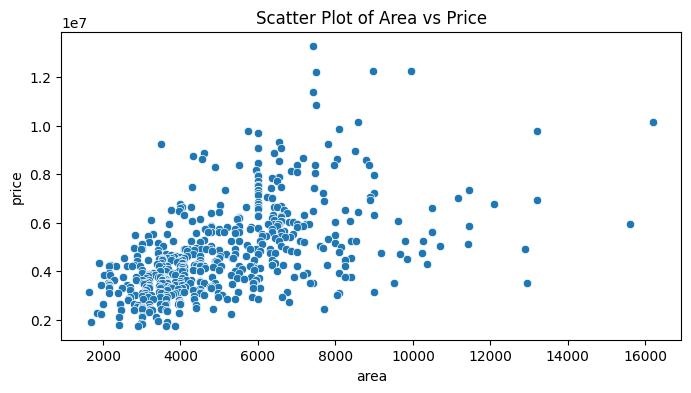

In [148]:
plt.figure(figsize=(8,4)) 
sns.scatterplot(data=df, x='area', y='price')  
plt.title("Scatter Plot of Area vs Price") 
plt.show()


In [ ]:
df.query('area > 12000')
# Drop  7,125
# it may but i can't drop 10,66,69,211,403

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished


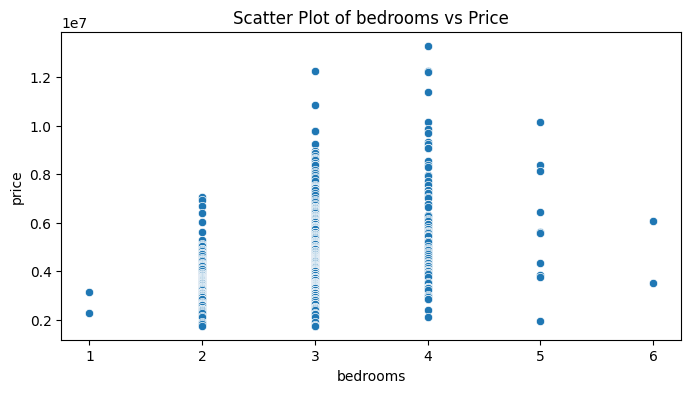

In [150]:
plt.figure(figsize=(8,4)) 
sns.scatterplot(data=df, x='bedrooms', y='price')  
plt.title("Scatter Plot of bedrooms vs Price") 
plt.show()

In [151]:
num['bedrooms'].unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

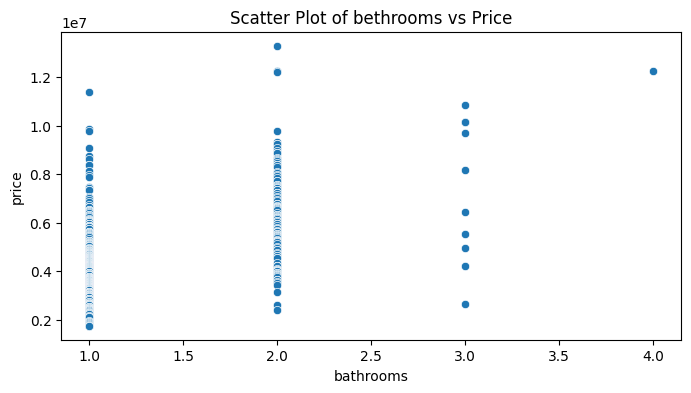

In [152]:
plt.figure(figsize=(8,4)) 
sns.scatterplot(data=df, x='bathrooms', y='price')  
plt.title("Scatter Plot of bethrooms vs Price") 
plt.show()

In [153]:
stats.zscore(df["bathrooms"]).sort_values(ascending=False).head()

1      5.405809
89     3.413810
499    3.413810
33     3.413810
5      3.413810
Name: bathrooms, dtype: float64

In [154]:
df.query('bathrooms==4.0')
# Drop 1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


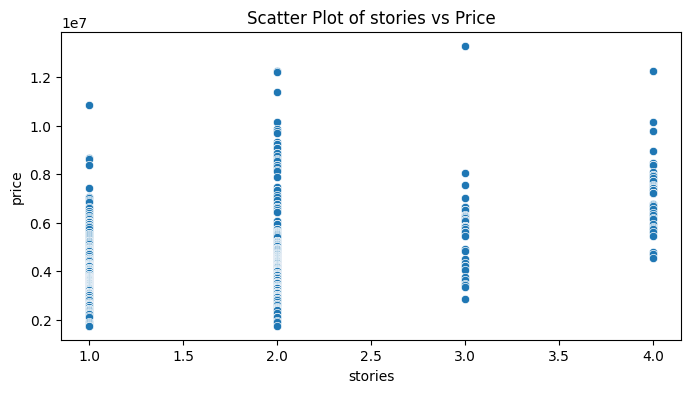

In [155]:
plt.figure(figsize=(8,4)) 
sns.scatterplot(data=df, x='stories', y='price')  
plt.title("Scatter Plot of stories vs Price") 
plt.show()

In [156]:
df.query('stories == 3 & price > 12000000')
# Drop 0

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


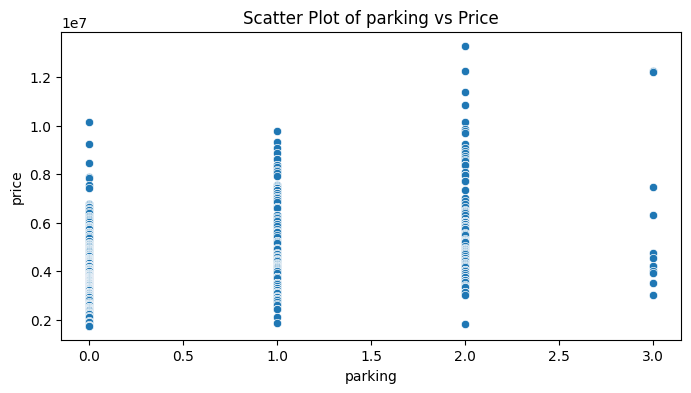

In [157]:
plt.figure(figsize=(8,4)) 
sns.scatterplot(data=df, x='parking', y='price')  
plt.title("Scatter Plot of parking vs Price") 
plt.show()

In [158]:
df.query('parking == 3.0 & price > 12000000')
# Drop 1,3

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [159]:
drop_values=[7,125,3,1,0]

In [160]:
df.iloc[0]

price                13300000
area                     7420
bedrooms                    4
bathrooms                   2
stories                     3
mainroad                  yes
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning           yes
parking                     2
prefarea                  yes
furnishingstatus    furnished
Name: 0, dtype: object

 <!-- Checking the outlier in categorical columns -->

In [161]:
df.drop(index=drop_values, inplace=True) 
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished


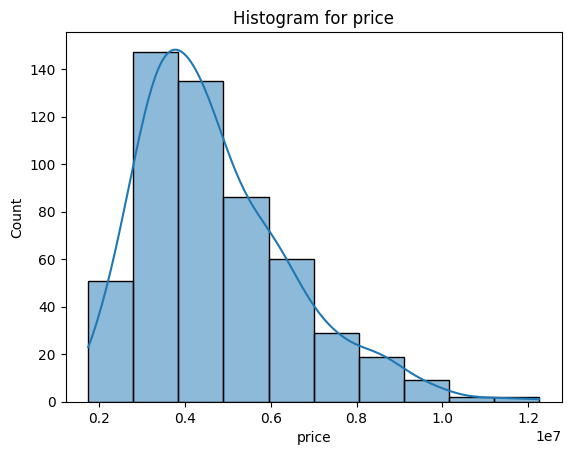

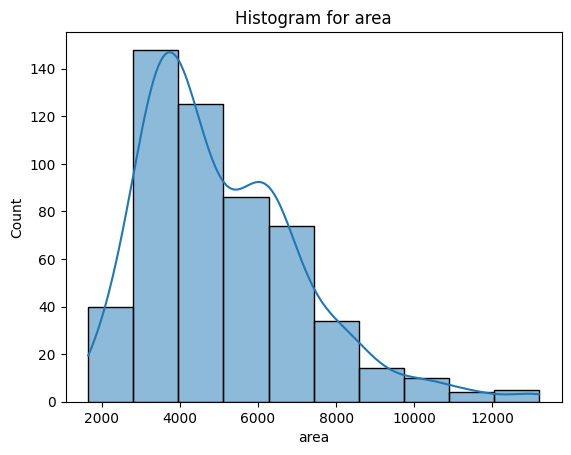

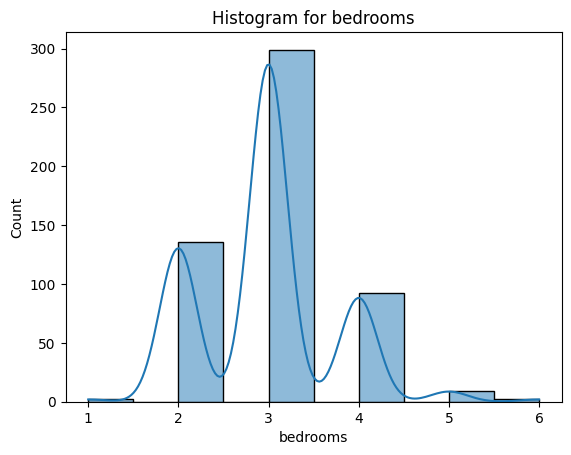

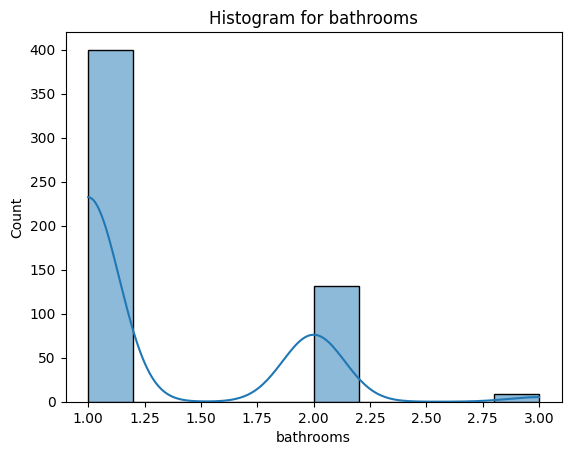

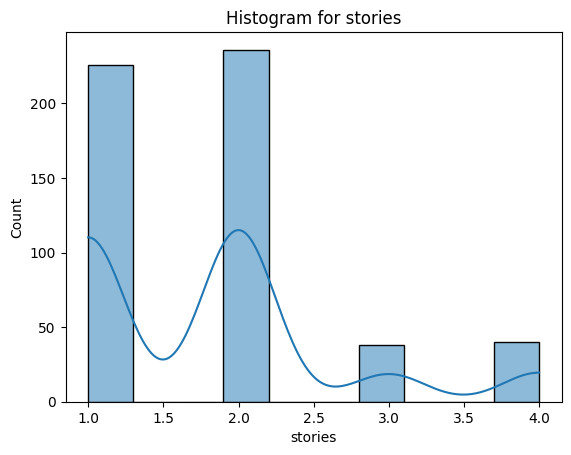

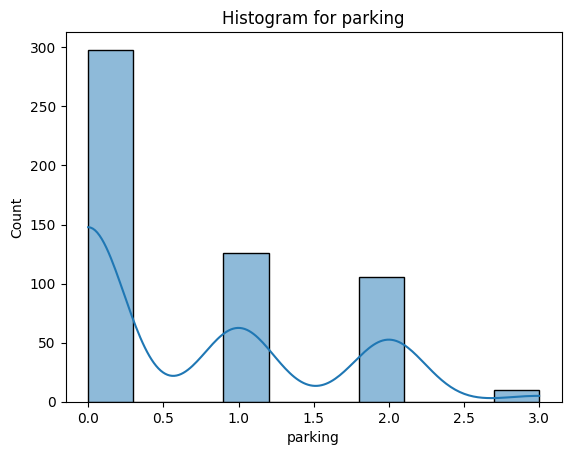

In [162]:
for column in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(f"Histogram for {column}")
    plt.show()


### Check the outlier in categorical columns

In [163]:
cat.columns.to_list()

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [164]:
cat["mainroad"].unique()

array(['yes', 'no'], dtype=object)

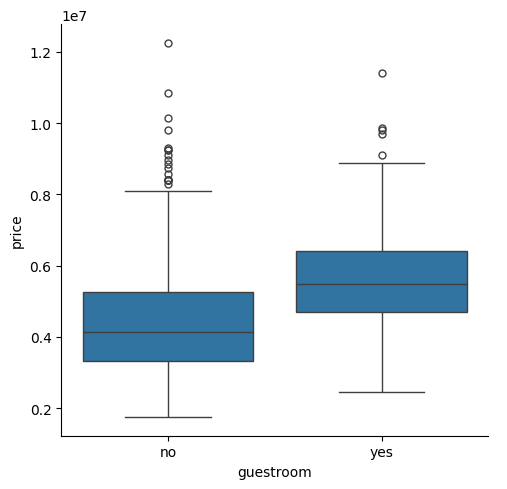

In [165]:
sns.catplot(data=df, x='guestroom', y="price", kind="box")

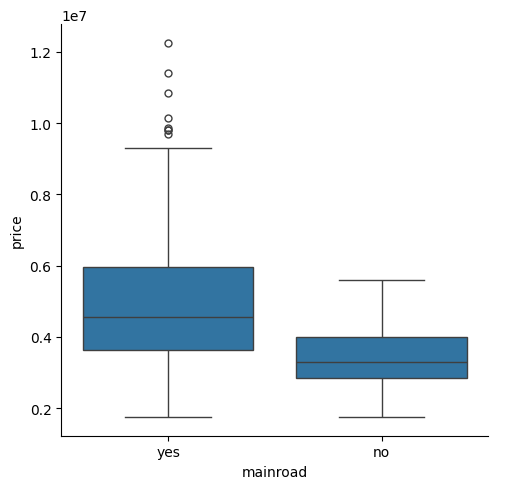

In [166]:
sns.catplot(data=df, x="mainroad", y="price", kind="box")

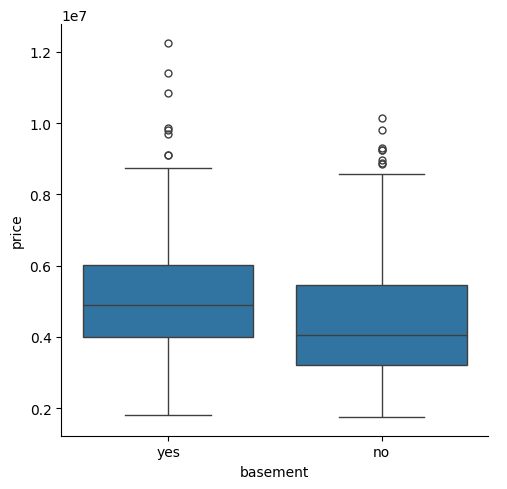

In [167]:
sns.catplot(data=df, x='basement', y="price", kind="box")

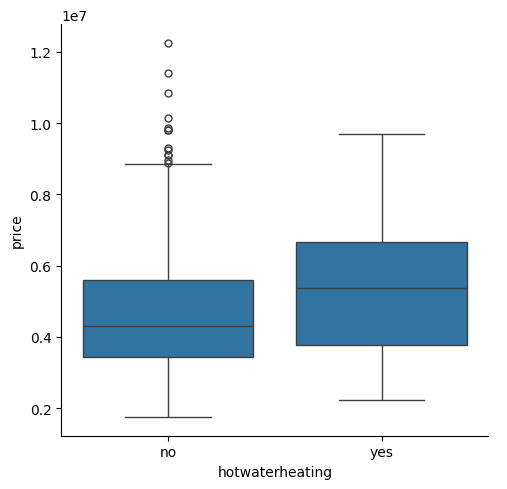

In [168]:
sns.catplot(data=df, x='hotwaterheating', y="price", kind="box")

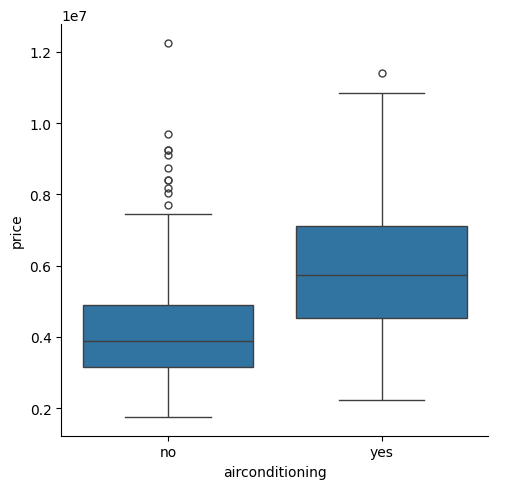

In [169]:
sns.catplot(data=df, x='airconditioning', y="price", kind="box")

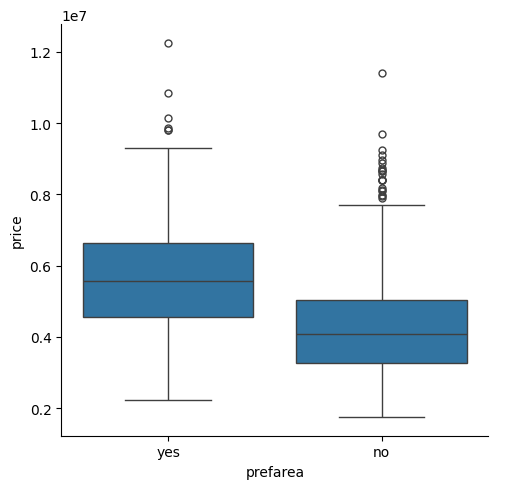

In [170]:
sns.catplot(data=df, x='prefarea', y="price", kind="box" )

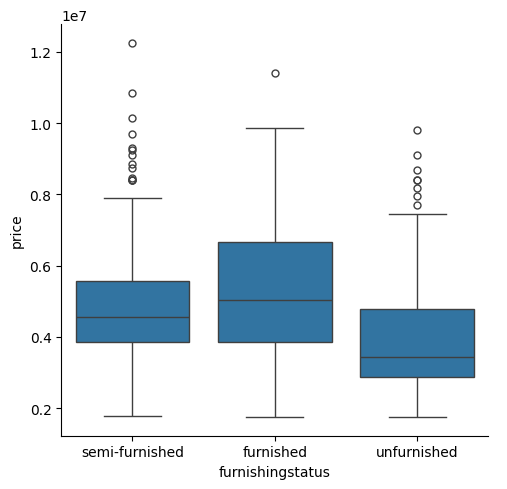

In [171]:
sns.catplot(data=df, x= 'furnishingstatus', y="price", kind="box")

<Axes: ylabel='price'>

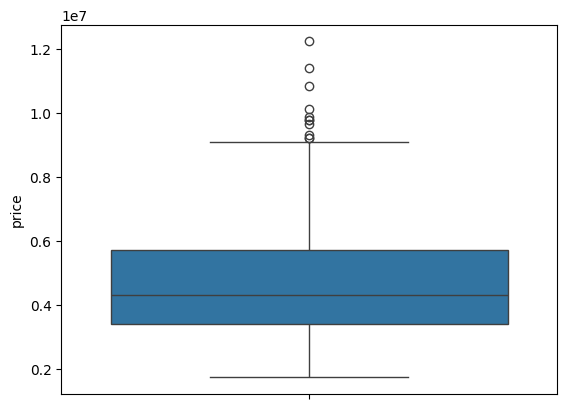

In [172]:
sns.boxplot(df["price"])

In [173]:

def outlierFinding(data):
    outlier = []
    q1,q3 = np.percentile(df['price'],[25,75])
    iqr = q3-q1
    upperLayer=q3+1.5*(iqr)
    lowerLayer=q1-1.5*(iqr)
    # for i in data:
    #     if(i < lowerLayer or i > upperLayer):
    #         outlier.append(i)
        
    return lowerLayer,upperLayer
lowerLayer,upperLayer = outlierFinding(df["price"])

filterData=df[(df["price"]>=lowerLayer ) & (df["price"]<=upperLayer)]
print("WithoutOutlier :",filterData)


WithoutOutlier :        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15   9100000  6000         4          1        2      yes        no      yes   
16   9100000  6600         4          2        2      yes       yes      yes   
17   8960000  8500         3          2        4      yes        no       no   
18   8890000  4600         3          2        2      yes       yes       no   
19   8855000  6420         3          2        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating ai

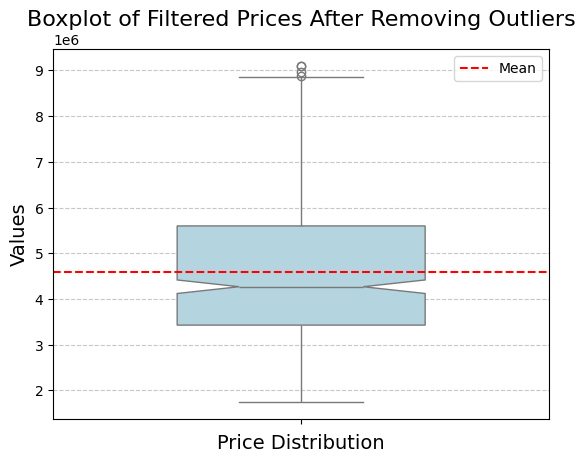

In [174]:
# After removing the outlier
sns.boxplot(data=filterData["price"], color="lightblue", width=0.5, notch=True)
plt.title("Boxplot of Filtered Prices After Removing Outliers", fontsize=16)  
plt.xlabel("Price Distribution", fontsize=14)  
plt.ylabel("Values", fontsize=14)  
plt.axhline(filterData["price"].mean(), color="red", linestyle='--', label='Mean')  
plt.legend() 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


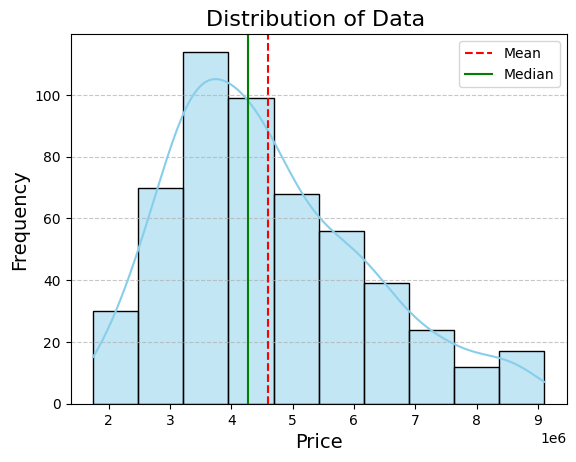

In [175]:
# After removing outlier the price data columns look like this
sns.histplot(filterData['price'], kde=True, bins=10, color="skyblue")
plt.title("Distribution of Data ", fontsize=16)  
plt.xlabel("Price", fontsize=14)  
plt.ylabel("Frequency", fontsize=14)  
plt.axvline(filterData['price'].mean(), color='red', linestyle='--', label='Mean')  
plt.axvline(filterData['price'].median(), color='green', linestyle='-', label='Median')  
plt.legend()  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

In [177]:
filterData.to_csv("../Data/process.csv",index=False)
print("save successfully")

save successfully


In [1]:
import nbformat

with open('01_exploratory_analysis.ipynb', 'r') as f:
    nb = nbformat.read(f, as_version=4)

# with open('fixed_file.ipynb', 'w') as f:
#     nbformat.write(nb, f)